In [1]:
# 主函数-----------
import numpy
import scipy.special
# 这里是主函数的定义, 定义为参数方式, 使用起来更方便
def nn(inputnode, hiddenode, outputnode, learnrate):
    # 定义参数--------------
    nn.inputnode=inputnode # 输入层网络节点数量
    nn.hiddenode=hiddenode # 隐藏层节点数量
    nn.outputnode=outputnode # 输出层节点数量
    nn.learnrate=learnrate # 这个比率是学习的速率

    # 正态分布初始化
    nn.ih = numpy.random.normal(0.0, pow(nn.hiddenode, -0.5),(nn.hiddenode, nn.inputnode))
    nn.ho = numpy.random.normal(0.0, pow(nn.outputnode, -0.5),(nn.outputnode, nn.hiddenode))
    # 启动函数 activation function 就是节点运算的函数
    nn.active_f=lambda x: scipy.special.expit(x)
    # 查询函数, 参数是一个list(数组)
    def query(inpl):
        # ----------这里是我偷偷插入的一行, 没什么可讲的, 就是把一维数组(向量), 整理成为二维矩阵
        inp=numpy.array(inpl, ndmin=2).T
        # 矩阵乘法如此简单
        hli=numpy.dot(nn.ih, inp)   # hidden level input
        hlo = nn.active_f(hli) # hidden level output 隐藏层输出等于用s函数处理一下输入
        # 输出层, 一毛一样
        oli=numpy.dot(nn.ho, hlo)
#         print('oli',oli)
        olo = nn.active_f(oli)
        return olo
    nn.query=query
    def train(inpl,tarl):
        inp=numpy.array(inpl, ndmin=2).T
        hli=numpy.dot(nn.ih, inp)   
        hlo = nn.active_f(hli) 
        oli=numpy.dot(nn.ho, hlo)   
        olo = nn.active_f(oli) 
        # 增加了目标数组
        tar=numpy.array(tarl, ndmin=2).T
        ## 拿到误差
        output_error=tar -olo # 最终结果误差
        # python做矩阵减法, 非常直观
        hidden_error=numpy.dot(nn.ho.T, output_error) 
        # hidden层的误差, 这里又是一次矩阵乘法
        ## 修正权重
        nn.ho += nn.learnrate*numpy.dot( output_error*(olo*(1-olo)), numpy.transpose(hlo))
        # 隐藏层到输出层的权重矩阵 += 学习速率* 矩阵乘法, 这个矩阵乘法的解释如下: 
        # olo*(1-olo)这个是一个S函数, 然后作用于输出误差矩阵,
        nn.ih += nn.learnrate*numpy.dot( hidden_error*(hlo*(1-hlo)), numpy.transpose(inp))
    nn.train=train

In [2]:
# ============训练改进==============
# 还是把现有的自己的手写数据存到训练数据里面, 试一试
import json
# import imageio
# import matplotlib.pyplot
# from skimage.transform import resize
import scipy.ndimage.interpolation

# --------------训练官方文件-------------
# 打开文件, 这个文件有十条数据, 文件在群里面, 把它放到你的python notebook所在的目录
dfile=open("./mnist_train_100.csv",'r')
# 读取数据
dlist=dfile.readlines()
# 关闭文件
dfile.close()
# 让参数生效
nn(28*28, 200, 10, 0.1)
rounders=5 #设置训练轮次


# 训练所有数据
for i in range(rounders):
    # 训练初始数据
    for re in dlist:
        a=re.split(',') # 把字符串用逗号拆成数组
        # 这里是把颜色的数字压缩到0-1之间
        ia=(numpy.asfarray(a[1:])/255.0*0.99+0.01)
        # 制造训练的target数据
        targetv=numpy.zeros(nn.outputnode) +0.01 # 整体都初始化为0.01
        # 因为第一个数字是这一行数据的数字, 所以用这个数字做target是非常合理的
        targetv[int(a[0])]=0.99 # 只有目标的值是0.99, 其他值应该都是0.01
        # 开始训练
        nn.train(ia, targetv)
        
        # 左右倾斜一下, 作为训练数据
#         img10r=scipy.ndimage.interpolation.rotate(img.reshape(28,28),10,cval=0.01, reshape=False)
     
        img10 = scipy.ndimage.interpolation.rotate(ia.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        nn.train(img10.reshape(784), targetv)
        img10b = scipy.ndimage.interpolation.rotate(ia.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        nn.train(img10b.reshape(784), targetv)
        
        
# # --------------训练我自己的手写文件------------

#         with open('myhandwritepic.json', 'r') as f:
#             data = json.load(f)

#             for i, re in enumerate(data):
#                 # 这里是把颜色的数字压缩到0-1之间
#                 ia=numpy.array(re).ravel()/255.0*0.99+0.01
#                 # 制造训练的target数据
#                 targetv=numpy.zeros(nn.outputnode) +0.01 # 整体都初始化为0.01
#                 # 因为第一个数字是这一行数据的数字, 所以用这个数字做target是非常合理的
#                 targetv[int(a[i])]=0.99 # 只有目标的值是0.99, 其他值应该都是0.01
#                 # 开始训练
#                 nn.train(ia, targetv)

In [3]:
#----------验证结果-----------
dfile=open("./mnist_test.csv",'r')
dlist=dfile.readlines()
dfile.close()
errorlist=[]
for item in dlist:
    a=item.split(',')
    realresult=numpy.asfarray(a[0])
    ia=(numpy.asfarray(a[1:])/255.0*0.99+0.01)
    result= nn.query(ia) 
    resultnumber=numpy.argmax(result)
    if resultnumber != realresult:
        errorlist.append(item)
print((len(dlist)-len(errorlist))/len(dlist))

0.6936


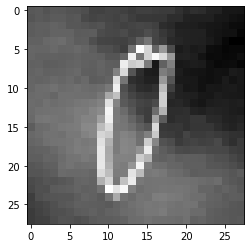

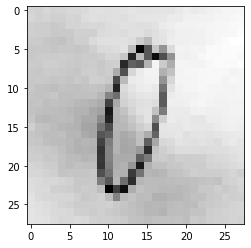

6 [[9.13749798e-02]
 [2.88622042e-02]
 [4.49742567e-02]
 [1.55433919e-04]
 [1.22467955e-02]
 [2.01504006e-03]
 [9.04994993e-01]
 [2.97897231e-03]
 [2.65406666e-03]
 [8.37739445e-05]]


In [4]:
#--------用自己的手写图片验证---------
import imageio
import matplotlib.pyplot
imgarrayo=imageio.imread('hand0.png',  as_gray=True)
from skimage.transform import resize
imgarray = resize(imgarrayo, (28, 28))
matplotlib.pyplot.imshow(imgarray, cmap='Greys',interpolation='None')
matplotlib.pyplot.show()
imgdata=255.0-imgarray#.resize(28*28)
matplotlib.pyplot.imshow(imgdata, cmap='Greys',interpolation='None')
matplotlib.pyplot.show()
# print(imgdata)
imgdata=(imgdata/255.0*0.99+0.01)

# print(imgdata)
result= nn.query(ia) 
resultnumber=numpy.argmax(result)
print(resultnumber, result)

In [5]:
#--------用自己的手写图片多张验证---------
import scipy.misc
import json
errorlist=[]
json_data=[]
for x in range(10):
 import imageio
 imgarrayo=imageio.imread('hand'+str(x)+'.png',  as_gray=True)
 from skimage.transform import resize
 imgarray = resize(imgarrayo, (28, 28))
 imgdata=255.0-imgarray#.resize(28*28)

 # 此时输出这些图片到我自己的文件
 json_data.append(imgdata)

 # print(imgdata)
 imgdata=(imgdata/255.0*0.99+0.01)
 # print(imgdata)
 result= nn.query(ia) 
 resultnumber=numpy.argmax(result)
 print(resultnumber)
 if resultnumber != x:
     errorlist.append(item)
print((10-len(errorlist))/10)

with open('myhandwritepic.json', 'w') as json_file:
  json.dump(numpy.array(json_data).tolist(), json_file)


6
6
6
6
6
6
6
6
6
6
0.1


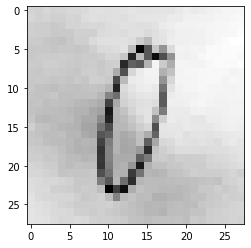

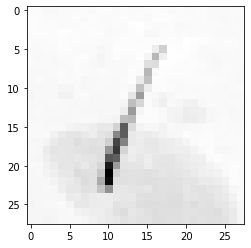

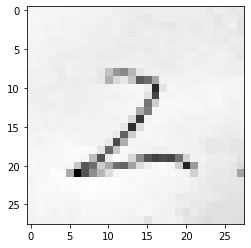

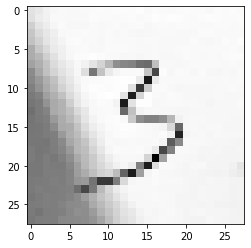

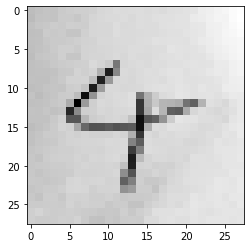

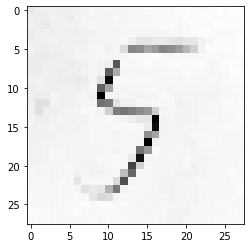

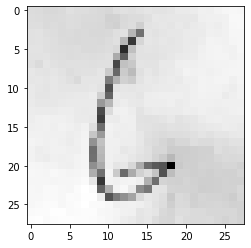

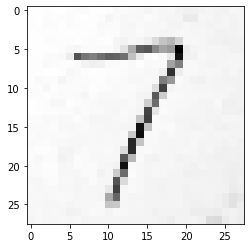

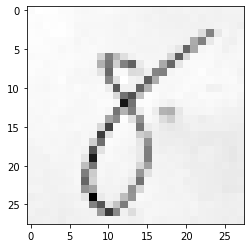

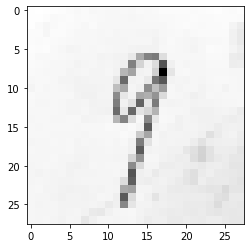

In [6]:
# ----------验证一下, 把json打印出来----------
import matplotlib.pyplot
import numpy
import json
with open('myhandwritepic.json', 'r') as f:
    data = json.load(f)
    for re in data:
        image_a=re
        matplotlib.pyplot.imshow(image_a, cmap='Greys',interpolation='None')
        matplotlib.pyplot.show()